In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv", low_memory=False)

In [2]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [3]:
df = df[~((df['CMPLNT_FR_DT'].isnull()) |(df['CMPLNT_FR_TM'].isnull()))]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048510 entries, 0 to 1048574
Data columns (total 24 columns):
CMPLNT_NUM           1048510 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048510 non-null object
CMPLNT_TO_DT         842565 non-null object
CMPLNT_TO_TM         842951 non-null object
RPT_DT               1048510 non-null object
KY_CD                1048510 non-null int64
OFNS_DESC            1045630 non-null object
PD_CD                1047777 non-null float64
PD_DESC              1047777 non-null object
CRM_ATPT_CPTD_CD     1048509 non-null object
LAW_CAT_CD           1048510 non-null object
JURIS_DESC           1048510 non-null object
BORO_NM              1048510 non-null object
ADDR_PCT_CD          1048509 non-null float64
LOC_OF_OCCUR_DESC    830766 non-null object
PREM_TYP_DESC        1043821 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016095 non-null fl

In [5]:
def DTTM(dt,tm):
    return dt + ' ' + tm

In [6]:
result = []
for dt, tm in zip(df['CMPLNT_FR_DT'], df['CMPLNT_FR_TM']):
    result.append(DTTM(dt,tm))

In [7]:
df['CMPLNT_FR'] = result

In [8]:
#Convert string data to datetime object
import datetime
df['CMPLNT_FR'] = df['CMPLNT_FR'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %H:%M:%S'))

In [9]:
#Get weekday and hour from date
df['day_of_week'] = df['CMPLNT_FR'].apply(lambda x: x.isoweekday())
df['hour'] = df['CMPLNT_FR'].apply(lambda x: x.hour)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

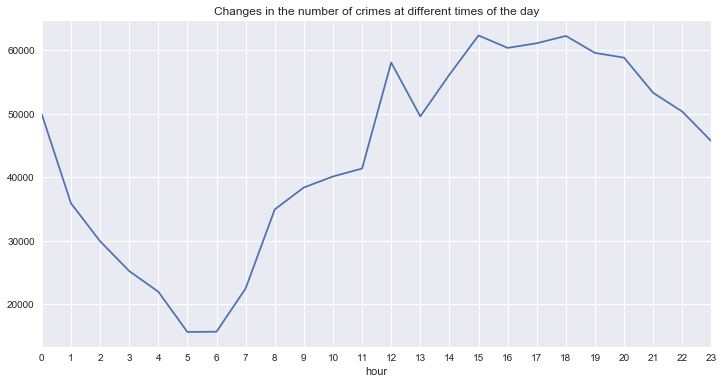

In [11]:
#Changes in the number of crimes at different times of the day
plt.xticks(range(0,24))
plt.title('Changes in the number of crimes at different times of the day')
df.groupby(['hour']).size().plot(kind="line",figsize=(12,6))

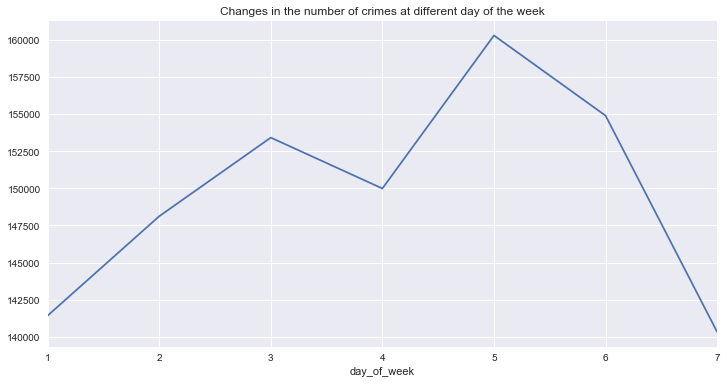

In [12]:
#Changes in the number of crimes at different day of the week
plt.title('Changes in the number of crimes at different day of the week')
df.groupby(['day_of_week']).size().plot(kind="line",figsize=(12,6))

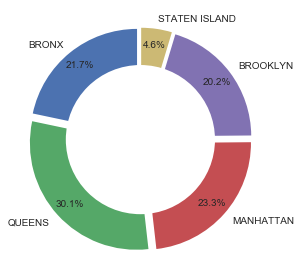

In [13]:
labels = list(df['BORO_NM'].unique())
sizes = df[~df['BORO_NM'].isnull()].groupby(['BORO_NM']).size()
explode = (0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

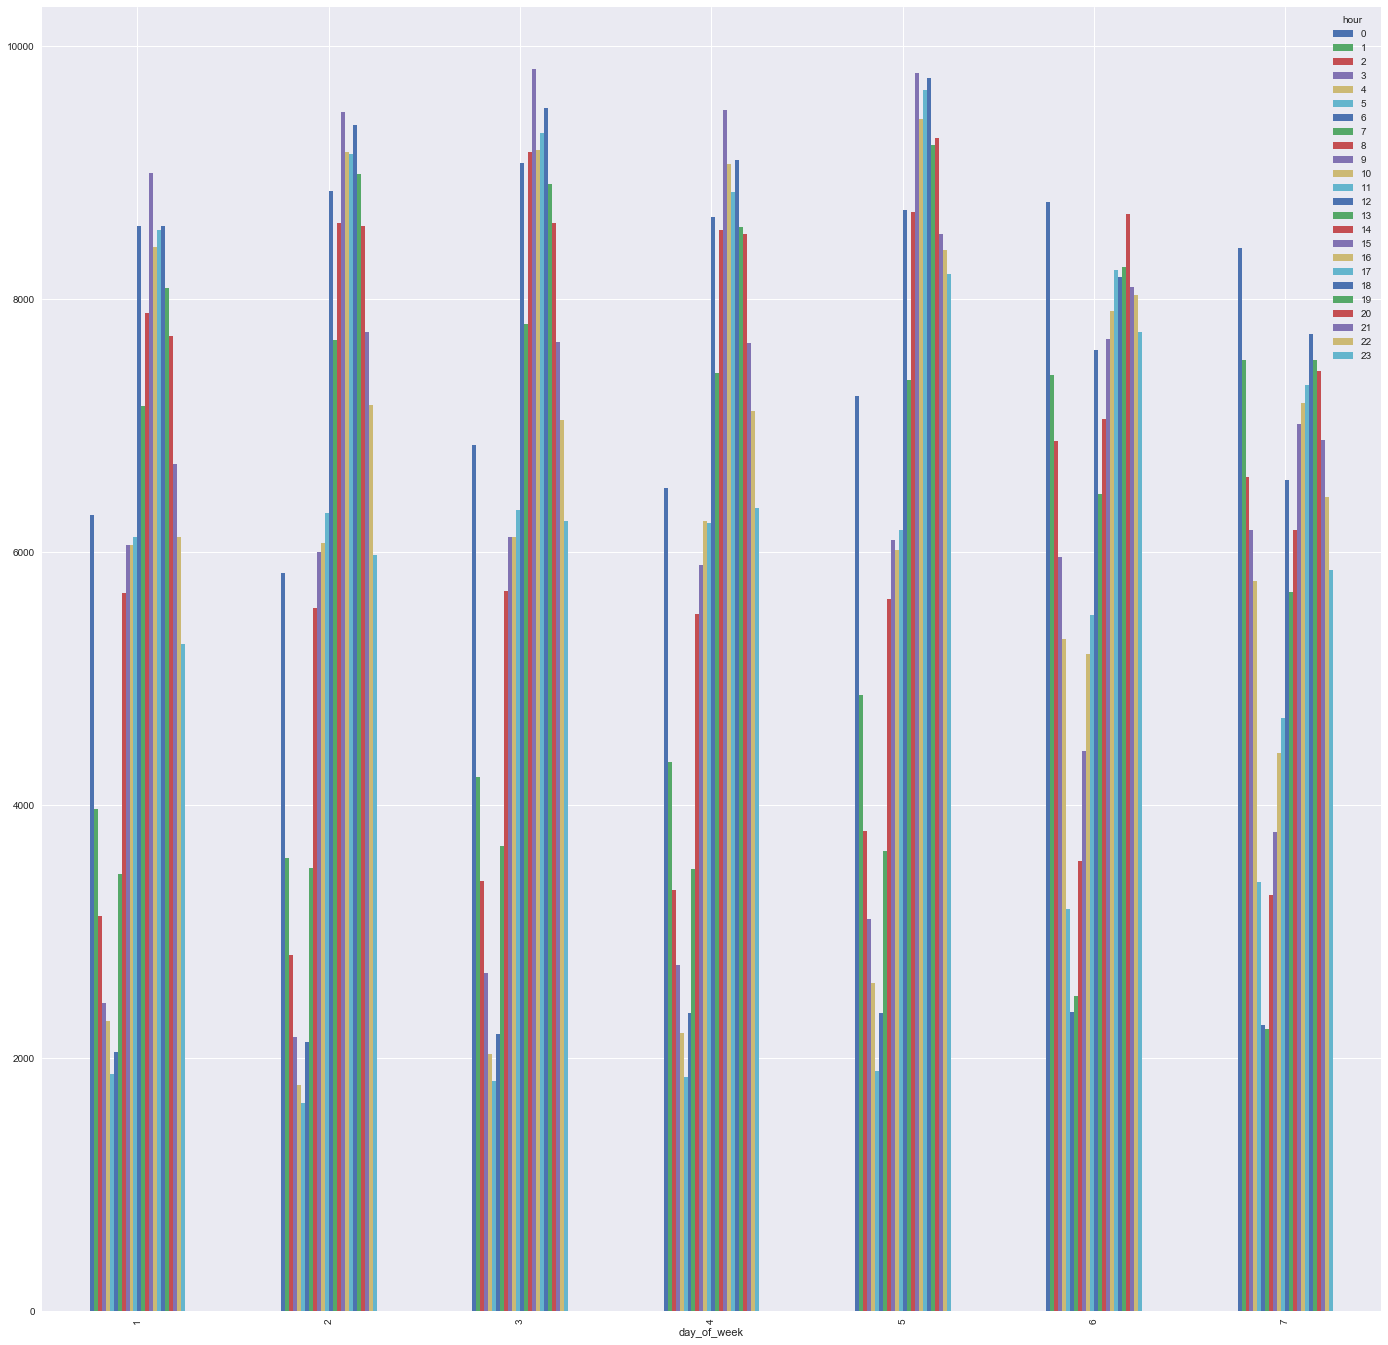

In [14]:

df.groupby(['day_of_week', 'hour']).size().unstack().plot(kind="bar",figsize=(24,24))


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048510 entries, 0 to 1048574
Data columns (total 27 columns):
CMPLNT_NUM           1048510 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048510 non-null object
CMPLNT_TO_DT         842565 non-null object
CMPLNT_TO_TM         842951 non-null object
RPT_DT               1048510 non-null object
KY_CD                1048510 non-null int64
OFNS_DESC            1045630 non-null object
PD_CD                1047777 non-null float64
PD_DESC              1047777 non-null object
CRM_ATPT_CPTD_CD     1048509 non-null object
LAW_CAT_CD           1048510 non-null object
JURIS_DESC           1048510 non-null object
BORO_NM              1048510 non-null object
ADDR_PCT_CD          1048509 non-null float64
LOC_OF_OCCUR_DESC    830766 non-null object
PREM_TYP_DESC        1043821 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016095 non-null fl

In [16]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    #Your code goes here
    logi = (eastlimit - westlimit) / zone_factor
    lati = (northlimit - southlimit) / zone_factor
    i = 0
    j = 0
    for lat in range(zone_factor):
        westlimit = -74.2635
        j = 0
        for log in range(zone_factor):
            lola = [[westlimit,southlimit],[westlimit+logi,southlimit],[westlimit+logi,southlimit+lati],[westlimit,southlimit+lati],[westlimit,southlimit]]
            zone = ((str(i)+"_"+str(j)),lola)
            zone_table.append(zone)
            j += 1
            westlimit += logi
        southlimit+= lati
        i += 1
    return zone_table

In [17]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    #Your code goes here
    for i in range(len(zone_table)):
        subzone = dict()
        subzone["geometry"] = {'coordinates': [zone_table[i][1]], 'type': 'Polygon'}
        subzone["properties"] = {'zone_id': zone_table[i][0]}
        subzone["type"] = 'Feature'
        zone_data_dict_features.append(subzone)   
    
    return zone_data_dict

In [18]:
#Sat Zone factor to 30
zone_table = createZoneTable(30)

In [19]:
def get_zone(lat,lon,zone_table):
    for i in range(len(zone_table)):
        while (lon > zone_table[i][1][0][0]) & (lon < zone_table[i][1][1][0]) & (lat > zone_table[i][1][1][1]) & (lat < zone_table[i][1][2][1]):
            return zone_table[i][0]
            break

In [20]:
df['zone'] = df.apply(lambda x:get_zone(x["Latitude"],x["Longitude"],zone_table),axis=1)

In [21]:
zones = df[~df['zone'].isnull()].groupby('zone')
counts = pd.DataFrame(zones.size())
counts.rename(columns={0:"counts"},inplace=True)
counts.reset_index(level=0,inplace=True)

In [22]:
counts.head()

,zone,counts
0,0_1,52
1,10_10,1361
2,10_14,2749
3,10_15,3196
4,10_16,1270


In [23]:
import folium
new_map = folium.Map(location = [40.4856, -74.2635],zoom_start=10)
new_map.choropleth(geo_data=createGeoJsonObject(zone_table), data=counts,
             columns=['zone','counts'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Client')

/Users/boris/anaconda3/envs/python/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [24]:
new_map.save('new_map.html')

In [25]:
new_map